# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [1]:
%matplotlib inline
import pandas as pd

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

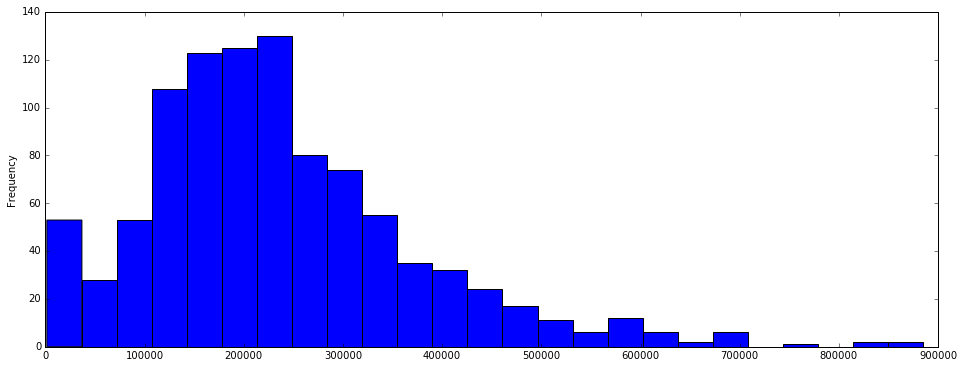

In [22]:
data["price"].plot(kind = "hist", figsize = (16,6), bins = 25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1189ed050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11919a2d0>]], dtype=object)

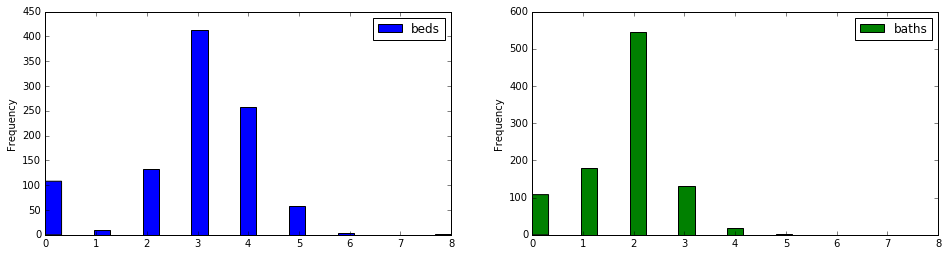

In [23]:
data[["beds", "baths"]].plot(kind = "hist", subplots = True, layout = (1,2), figsize = (16,4), bins = 25)

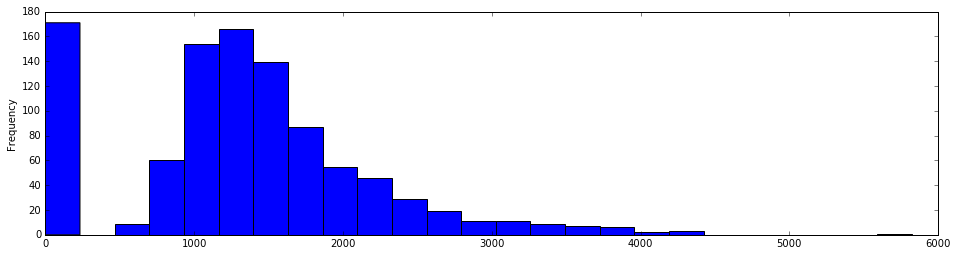

In [25]:
data["sq__ft"].plot(kind="hist", figsize = (16,4), bins = 25)

In [27]:
data["type"].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [29]:
data["sale_date"].value_counts()

Mon May 19 00:00:00 EDT 2008    268
Fri May 16 00:00:00 EDT 2008    264
Tue May 20 00:00:00 EDT 2008    177
Wed May 21 00:00:00 EDT 2008    158
Thu May 15 00:00:00 EDT 2008    118
Name: sale_date, dtype: int64

In [32]:
data["zip"].value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
95835    37
95757    36
95624    34
95843    33
95621    28
95822    24
95820    23
95762    23
95842    22
95834    22
95632    21
95660    21
95670    21
95608    20
95678    20
95833    20
95747    20
95815    18
95826    18
95630    17
95825    13
95673    13
95824    12
95832    12
95742    11
         ..
95661     8
95610     7
95817     7
95818     7
95841     7
95677     6
95821     6
95864     5
95603     5
95693     5
95819     4
95816     4
95683     4
95626     4
95726     3
95691     3
95814     3
95746     3
95623     2
95650     2
95811     2
95614     1
95619     1
95663     1
95631     1
95633     1
95635     1
95655     1
95690     1
95722     1
Name: zip, dtype: int64

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

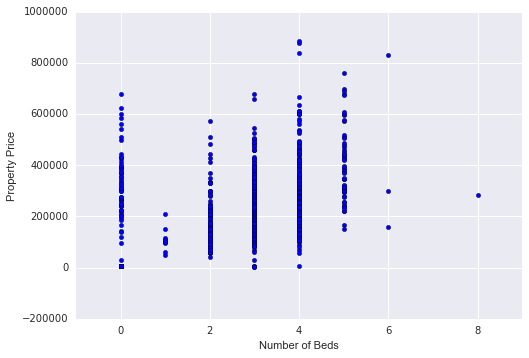

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of Beds")
plt.ylabel("Property Price")
plt.show()

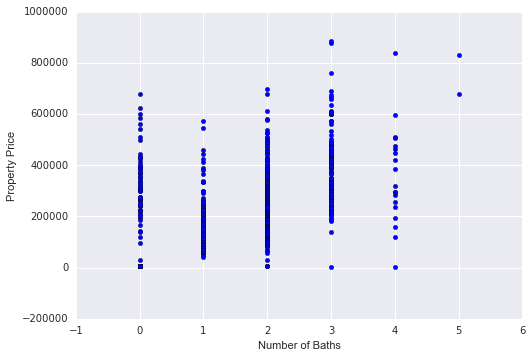

In [42]:
x = data['baths']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of Baths")
plt.ylabel("Property Price")
plt.show()

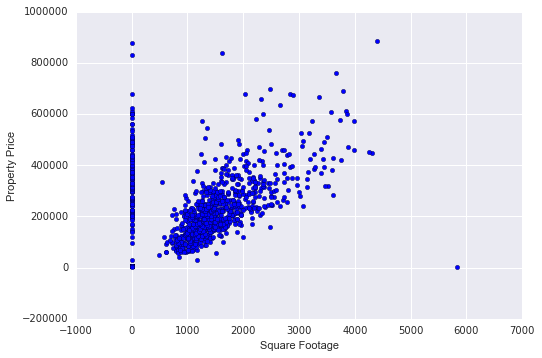

In [43]:
x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Square Footage")
plt.ylabel("Property Price")
plt.show()

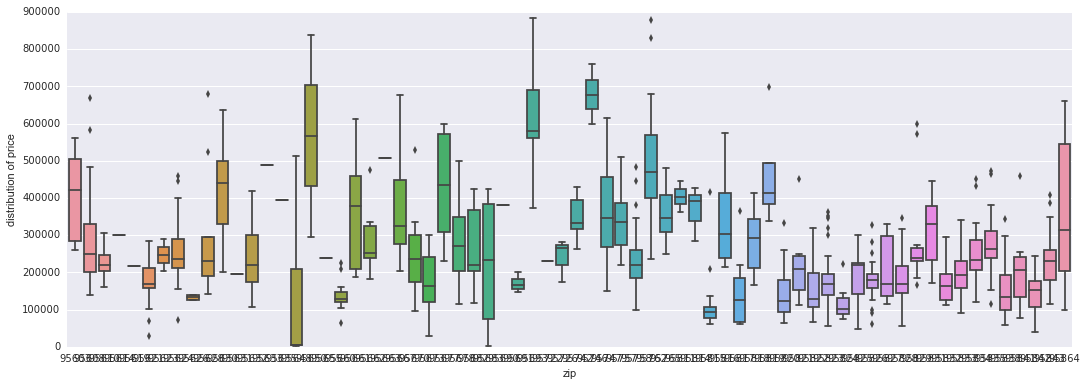

In [55]:
x = data['zip']
y = data['price']

plt.figure(figsize = (18,6))
ax = sns.boxplot(x = x, y = y)
ax.set_ylabel("distribution of price")
ax.set_xlabel("zip")

In [58]:
data.groupby(["zip", "type", "sale_date"])["price"].count()

zip    type          sale_date                   
95603  Condo         Mon May 19 00:00:00 EDT 2008     1
       Multi-Family  Mon May 19 00:00:00 EDT 2008     1
       Residential   Fri May 16 00:00:00 EDT 2008     2
                     Tue May 20 00:00:00 EDT 2008     1
95608  Condo         Mon May 19 00:00:00 EDT 2008     2
                     Wed May 21 00:00:00 EDT 2008     1
       Residential   Fri May 16 00:00:00 EDT 2008     7
                     Mon May 19 00:00:00 EDT 2008     3
                     Thu May 15 00:00:00 EDT 2008     2
                     Tue May 20 00:00:00 EDT 2008     3
                     Wed May 21 00:00:00 EDT 2008     2
95610  Multi-Family  Tue May 20 00:00:00 EDT 2008     1
       Residential   Fri May 16 00:00:00 EDT 2008     3
                     Thu May 15 00:00:00 EDT 2008     2
                     Tue May 20 00:00:00 EDT 2008     1
95614  Residential   Fri May 16 00:00:00 EDT 2008     1
95619  Residential   Fri May 16 00:00:00 EDT 2008     

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm



## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [ ]:
These